In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
digits = datasets.load_digits()

In [64]:
X,y=digits["data"],digits["target"]

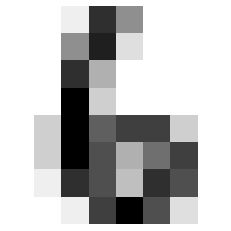

In [68]:
some_digit = X[360]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()

In [69]:
y[560]

7

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [72]:
y_train

array([1, 1, 8, ..., 2, 7, 1])

In [73]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.9925373134328358
0.9875311720698254
0.985


In [116]:
X_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  9., ...,  9.,  0.,  0.],
       [ 0.,  0.,  3., ...,  5.,  0.,  0.]])

In [112]:
sgd_clf.predict([X_test[0]])

array([False])

In [77]:
y_test[12]

4

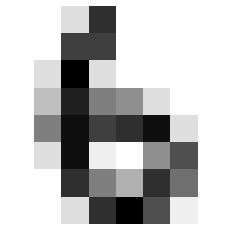

In [87]:
some_digit = X_test[213]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()

In [89]:
 from sklearn.model_selection import cross_val_score

In [91]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.99253731, 0.98753117, 0.985     ])

In [96]:
from sklearn.model_selection import cross_val_predict

In [104]:
y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [105]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_train_5, y_train_pred)

array([[1087,    7],
       [   7,  102]])

In [95]:
y_train_5

array([False, False, False, ..., False, False, False])

In [108]:
from sklearn.metrics import precision_score, recall_score

In [119]:
len(y_pred)

400

In [120]:
precision_score(y_train_5, y_train_pred) 

0.9357798165137615

In [110]:
recall_score(y_train_5, y_train_pred)

0.9357798165137615

In [121]:
from sklearn.metrics import f1_score

In [123]:
f1_score(y_train_5, y_train_pred)

0.9357798165137615